# UTMB Grade Adjusted Pace

In [53]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I find the gradient of each stage and multiply that by the pace. This gives the gradient adjusted pace which basically makes the race seem like a flat surface. This gives a further insight into the most difficult and important stages in the race.

In [54]:
df = pd.read_csv('../../data/elevation.csv', encoding = "ISO-8859-1")

In [55]:
df1 = pd.read_csv('../../data/1km_splits_full.csv', encoding = "ISO-8859-1")

Row 0: The altitude of the destination. For example, Chamonix to Delevret is 1741 metres, meaning this is the altitude at Delevret. 

Row 1: The rise or fall from the previous destination. A minus figure indicates a fall. 

Row 2: The distance between the stages

In [56]:
df.head()

,Chamonix to Delevret,Chamonix to Col de Voza,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,Col de Voza to Contamines,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,Contamines to Bonhomme,...,Les Tseppe to Vallorcine,Vallorcine to La Gardes,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,La Gardes to Chamonix,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,1741.0,NaN,1799,829.0,829.0,NaN,829,1160.0,1714.0,NaN,...,1292.0,NaN,2116.0,1281.0,1467.0,NaN,1870.0,1032.0,1870,1032.0
1,704.0,NaN,762,-208.0,-912.0,NaN,-970,331.0,554.0,NaN,...,-639.0,NaN,824.0,11.0,175.0,NaN,-246.0,-249.0,403,-838.0
2,13.6,NaN,23,21.5,7.6,NaN,6,10.3,8.1,NaN,...,5.8,NaN,7.7,6.3,3.7,NaN,3.3,8.7,7,7.4


Covert rise/falls to kilometres

In [57]:
df.loc['km_rise'] = df.iloc[1] / 1000

In [58]:
df.head()

,Chamonix to Delevret,Chamonix to Col de Voza,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,Col de Voza to Contamines,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,Contamines to Bonhomme,...,Les Tseppe to Vallorcine,Vallorcine to La Gardes,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,La Gardes to Chamonix,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,1741.000,NaN,1799.000,829.000,829.000,NaN,829.00,1160.000,1714.000,NaN,...,1292.000,NaN,2116.000,1281.000,1467.000,NaN,1870.000,1032.000,1870.000,1032.000
1,704.000,NaN,762.000,-208.000,-912.000,NaN,-970.00,331.000,554.000,NaN,...,-639.000,NaN,824.000,11.000,175.000,NaN,-246.000,-249.000,403.000,-838.000
2,13.600,NaN,23.000,21.500,7.600,NaN,6.00,10.300,8.100,NaN,...,5.800,NaN,7.700,6.300,3.700,NaN,3.300,8.700,7.000,7.400
km_rise,0.704,NaN,0.762,-0.208,-0.912,NaN,-0.97,0.331,0.554,NaN,...,-0.639,NaN,0.824,0.011,0.175,NaN,-0.246,-0.249,0.403,-0.838


In [59]:
df.loc['grade'] = df.iloc[3] / df.iloc[2]

In [60]:
df

,Chamonix to Delevret,Chamonix to Col de Voza,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,Col de Voza to Contamines,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,Contamines to Bonhomme,...,Les Tseppe to Vallorcine,Vallorcine to La Gardes,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,La Gardes to Chamonix,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,1741.000000,NaN,1799.00000,829.000000,829.000,NaN,829.000000,1160.000000,1714.000000,NaN,...,1292.000000,NaN,2116.000000,1281.000000,1467.000000,NaN,1870.000000,1032.000000,1870.000000,1032.000000
1,704.000000,NaN,762.00000,-208.000000,-912.000,NaN,-970.000000,331.000000,554.000000,NaN,...,-639.000000,NaN,824.000000,11.000000,175.000000,NaN,-246.000000,-249.000000,403.000000,-838.000000
2,13.600000,NaN,23.00000,21.500000,7.600,NaN,6.000000,10.300000,8.100000,NaN,...,5.800000,NaN,7.700000,6.300000,3.700000,NaN,3.300000,8.700000,7.000000,7.400000
km_rise,0.704000,NaN,0.76200,-0.208000,-0.912,NaN,-0.970000,0.331000,0.554000,NaN,...,-0.639000,NaN,0.824000,0.011000,0.175000,NaN,-0.246000,-0.249000,0.403000,-0.838000
grade,0.051765,NaN,0.03313,-0.009674,-0.120,NaN,-0.161667,0.032136,0.068395,NaN,...,-0.110172,NaN,0.107013,0.001746,0.047297,NaN,-0.074545,-0.028621,0.057571,-0.113243


In [61]:
df1.head()


,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


In [62]:
stages = df1.filter(like = 'to')
times = df1.filter(like = 'time')

In [63]:
df_non_stage = df1[[  'Year', 
'team'           ,
'name_mask',
'gender',
'category'        , 
'nationality'    ,
'time'
 ]]

In [64]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


## Grade Adjusted Pace

The minetti formula is used to calculate the grade. 

In [65]:
def pace_adjustment_minetti(g):
    res = (1 + (g* (19.5 + g * (46.3 + g * (-43.3 + g * (-30.4 + g * 155.4))))) / 3.6)
    return np.clip(res, 0.1, None)

In [66]:
gap_samp = pace_adjustment_minetti(df.loc['grade']) * 5.281863

In [67]:
grades = 5.281863 / gap_samp 

In [68]:
grades

Chamonix to Delevret               0.761532
Chamonix to Col de Voza                 NaN
Chamonix to La Charme              0.838133
Chamonix to St-Gervais             1.053950
Delevret to St-Gervais             1.807799
Col de Voza to Contamines               NaN
La Charme to St-Gervais            1.997080
St-Gervais to Contamines           0.842499
Contamines to La Balme             0.700934
Contamines to Bonhomme                  NaN
La Balme to Bonhomme               0.516947
La Balme to Chapieux                    NaN
Bonhomme to Chapieux               2.020086
Chapieux to Col Seigne             0.621062
Col Seigne to Refuge Elisabeth          NaN
Col Seigne to Lac Combal           1.739811
Col Seigne to Mt-Favre                  NaN
Refuge Elisabeth to Mt-Favre            NaN
Refuge Elisabeth to Checruit            NaN
Lac Combal to Mt-Favre             0.508616
Mt-Favre to Checruit               1.832320
Mt-Favre to Courmayeur                  NaN
Checruit to Courmayeur          

In [69]:
elev = grades*stages

In [70]:
elev

,Argentiere to Chamonix,Arnouvaz to Col Ferret,Bertone to Bonatti,Bertone to Refuge Elena,Bonatti to Arnouvaz,Bonhomme to Chapieux,Bovine to Trient,Chamonix to Col de Voza,Chamonix to Delevret,Chamonix to La Charme,...,St-Gervais to Contamines,Tete aux Vents to Flegere,Trient to La Catogne,Trient to Les Tseppe,Trient to Vallorcine,Vallorcine to Argentiere,Vallorcine to Col Montet,Vallorcine to La Gardes,Vallorcine to Tete aux Vents,Villaz to Bertone
0,NaN,5.493334,6.456256,NaN,8.204950,10.060820,NaN,NaN,4.022310,NaN,...,4.586031,NaN,NaN,4.534051,NaN,NaN,6.067253,NaN,NaN,NaN
1,NaN,5.652586,6.645315,NaN,8.614387,10.041015,NaN,NaN,3.919652,NaN,...,4.635109,NaN,NaN,4.599921,NaN,NaN,6.130417,NaN,NaN,NaN
2,NaN,NaN,6.734412,NaN,8.245489,11.493365,NaN,NaN,4.222026,NaN,...,4.633745,NaN,NaN,4.859741,NaN,NaN,6.169017,NaN,NaN,NaN
3,NaN,6.128629,6.988664,NaN,9.161654,11.598990,NaN,NaN,4.023243,NaN,...,4.584668,NaN,NaN,4.797531,NaN,NaN,5.909343,NaN,NaN,NaN
4,NaN,5.500183,6.814816,NaN,8.156304,10.047617,NaN,NaN,3.918719,NaN,...,4.703272,NaN,NaN,4.310825,NaN,NaN,6.555019,NaN,NaN,NaN
5,NaN,6.580699,7.221184,NaN,9.311646,11.473560,NaN,NaN,4.102569,NaN,...,4.677370,NaN,NaN,4.843274,NaN,NaN,6.456764,NaN,NaN,NaN
6,NaN,NaN,6.651834,NaN,8.504934,11.638600,NaN,NaN,4.160431,NaN,...,4.692366,NaN,NaN,5.203729,NaN,NaN,6.709420,NaN,NaN,NaN
7,NaN,6.640632,15.963533,NaN,9.421099,11.816843,NaN,NaN,4.156698,NaN,...,4.618750,NaN,NaN,5.646521,NaN,NaN,6.895403,NaN,NaN,NaN
8,NaN,6.424872,7.345051,NaN,10.211596,12.377978,NaN,NaN,3.916853,NaN,...,4.562856,NaN,NaN,5.864258,NaN,NaN,9.639528,NaN,NaN,NaN
9,NaN,6.582411,7.831823,NaN,9.652167,11.407544,NaN,NaN,4.225759,NaN,...,4.643288,NaN,NaN,5.470868,NaN,NaN,7.144550,NaN,NaN,NaN


In [71]:
df = elev.join(df_non_stage)

In [72]:
df = df[[ #'Unnamed: 0'  , 
    'Year', 
#'bib'              ,
#'name_mask'           ,
'team'           ,
    'name_mask',
'gender',
'category'        , 
#'rank'             ,
'nationality'      ,
'time'             ,
#'timediff'         ,
'Chamonix to Delevret'            ,
#'Chamonix to Col de Voza'          ,
'Chamonix to La Charme'          ,
'Chamonix to St-Gervais'          ,
'Delevret to St-Gervais'            ,
#'Col de Voza to Contamines'          ,
'La Charme to St-Gervais'          ,
'St-Gervais to Contamines'          ,
'Contamines to La Balme'            ,
#'Contamines to Bonhomme'          ,
'La Balme to Bonhomme'          ,
#'La Balme to Chapieux'          ,
'Bonhomme to Chapieux'          ,
'Chapieux to Col Seigne'            ,
#'Col Seigne to Refuge Elisabeth'          ,
'Col Seigne to Lac Combal'          ,
#'Col Seigne to Mt-Favre'          ,
#'Refuge Elisabeth to Mt-Favre'         ,
#'Refuge Elisabeth to Checruit'        ,
'Lac Combal to Mt-Favre'         ,
'Mt-Favre to Checruit'         ,
#'Mt-Favre to Courmayeur'        ,
'Checruit to Courmayeur'        ,
'Courmayeur to Courmayeur2'          ,
'Courmayeur2 to Bertone'          ,
'Courmayeur to Bertone'        ,
#'Bertone to Refuge Elena'         ,
'Bertone to Bonatti'         ,
#'Refuge Elena to Col Ferret'          ,
'Bonatti to Arnouvaz'        ,
'Arnouvaz to Col Ferret'         ,
#'Col Ferret to La Peulaz'         ,
'Col Ferret to La Fouly'        ,
#'La Peulaz to La Fouly'          ,
#'La Fouly to Praz de Fort'     ,
'La Fouly to Champex La'        ,
#'Praz de Fort to Champex La'        ,
#'Praz de Fort to Champex den Bas',
'Champex La to Bovine'        ,
'Champex La to Mortigny'        ,
'Champex La to Giete'        ,
#'Champex den Bas to Bovine'        ,
'Bovine to Trient'         ,
'Mortigny to Trient'         ,
'Giete to Trient'          ,
'Trient to La Catogne'        ,
'Trient to Les Tseppe'        ,
#'Trient to Vallorcine'        ,
'La Catogne to Vallorcine'         ,
'Les Tseppe to Vallorcine'         ,
#'Vallorcine to La Gardes'         ,
'Vallorcine to Tete aux Vents'         ,
'Vallorcine to Argentiere'         ,
'Vallorcine to Col Montet'         ,
#'La Gardes to Chamonix'        ,
'Tete aux Vents to Flegere'          ,
'Argentiere to Chamonix'     ,
'Col Montet to Flegere'        ,
'Flegere to Chamonix'   ]]

In [73]:
df.head()

,Year,team,name_mask,gender,category,nationality,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,2017,Salomon,7efc0cb7e70d7cd9da46a58bbf01af66,Male,Senior Men (23-39),FR,1141.900000,4.022310,NaN,NaN,...,4.534051,NaN,13.508974,NaN,NaN,6.067253,NaN,NaN,6.668578,9.238605
1,2017,Salomon,1e4ba9a22b3fecb9136ecfcf7f470868,Male,Senior Men (23-39),ES,1156.983333,3.919652,NaN,NaN,...,4.599921,NaN,12.617061,NaN,NaN,6.130417,NaN,NaN,6.878126,8.948532
2,2017,Hoka,0d928f7482046900e19dba217d7befa5,Male,Senior Men (23-39),US,1193.000000,4.222026,NaN,NaN,...,4.859741,NaN,13.073039,NaN,NaN,6.169017,NaN,NaN,7.251440,8.420044
3,2017,Asics,93f20063908ba5d48724dcf31740a52a,Male,Senior Men (23-39),FR,1203.650000,4.023243,NaN,NaN,...,4.797531,NaN,12.852566,NaN,NaN,5.909343,NaN,NaN,6.832343,8.483622
4,2017,Hoka,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),US,1211.633333,3.918719,NaN,NaN,...,4.310825,NaN,11.199020,NaN,NaN,6.555019,NaN,NaN,7.438097,9.071714


# Average Pacing

In [74]:
df['AVG_Pace'] = df.filter(like='to').mean(axis = 1)

In [75]:
df.head()

,Year,team,name_mask,gender,category,nationality,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,...,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,AVG_Pace
0,2017,Salomon,7efc0cb7e70d7cd9da46a58bbf01af66,Male,Senior Men (23-39),FR,1141.900000,4.022310,NaN,NaN,...,NaN,13.508974,NaN,NaN,6.067253,NaN,NaN,6.668578,9.238605,7.145710
1,2017,Salomon,1e4ba9a22b3fecb9136ecfcf7f470868,Male,Senior Men (23-39),ES,1156.983333,3.919652,NaN,NaN,...,NaN,12.617061,NaN,NaN,6.130417,NaN,NaN,6.878126,8.948532,7.180423
2,2017,Hoka,0d928f7482046900e19dba217d7befa5,Male,Senior Men (23-39),US,1193.000000,4.222026,NaN,NaN,...,NaN,13.073039,NaN,NaN,6.169017,NaN,NaN,7.251440,8.420044,7.866155
3,2017,Asics,93f20063908ba5d48724dcf31740a52a,Male,Senior Men (23-39),FR,1203.650000,4.023243,NaN,NaN,...,NaN,12.852566,NaN,NaN,5.909343,NaN,NaN,6.832343,8.483622,7.538354
4,2017,Hoka,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),US,1211.633333,3.918719,NaN,NaN,...,NaN,11.199020,NaN,NaN,6.555019,NaN,NaN,7.438097,9.071714,7.261669


In [76]:
df.to_csv('../../data/grade_adjusted_pace.csv')

The average pace of the top runner has been cut by 2 minutes due to the grade adjusted pacing. 

## Gender Pacing

In [112]:
df1.groupby(['gender'])['AVG_Pace'].mean()

gender
Female    14.977206
Male      14.643738
Name: AVG_Pace, dtype: float64

In [113]:
df.groupby(['gender'])['AVG_Pace'].mean()

gender
Female    15.666294
Male      15.184482
Name: AVG_Pace, dtype: float64

In [114]:
df1.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()

gender,Female,Male
Year,,
2008,15.963855,15.268551
2009,15.284048,14.556426
2011,14.048477,13.911457
2013,14.490960,14.111441
2014,14.665532,14.172772
2015,15.411888,15.326217
2016,15.478393,15.325801
2017,14.518917,14.418069


In [115]:
df.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()

gender,Female,Male
Year,,
2008,18.386474,17.063199
2009,15.756546,14.961110
2011,14.533203,14.253217
2013,15.060547,14.548026
2014,15.388337,14.702513
2015,15.840857,15.622610
2016,15.927157,15.658805
2017,14.864620,14.636482


Average pace per segment for each gender

In [116]:
df3 = df.drop([ 'Year'], axis = 1)
df3.groupby(['gender']).mean()

,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,AVG_Pace
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,2437.422277,6.997534,4.873916,9.393288,14.770756,41.534140,8.801991,9.004067,9.736005,22.767197,9.482615,22.743615,9.977512,19.317356,25.852587,26.745038,10.562191,12.074919,13.002207,17.569551,11.190987,18.823815,14.939913,15.490920,22.593760,16.301860,27.518205,13.140991,26.392923,12.680934,11.271733,23.510785,30.921729,13.008765,12.233577,15.170984,24.547737,14.941562,14.509888,20.683258,15.666294
Male,2382.655319,6.723359,4.491702,8.855680,13.934373,37.603773,8.642625,9.038692,9.332245,21.321234,9.287667,21.711937,9.694500,18.534625,24.658058,30.064745,10.084877,12.081083,12.389267,17.176933,10.752154,17.999313,14.411103,15.251632,23.549549,16.053314,26.024240,13.279487,25.462092,12.446746,11.414208,22.874416,30.766261,12.673782,12.584709,16.020367,23.657780,15.028152,14.295259,20.110410,15.184482


## Category pacing

In [117]:
df.groupby(['category'])['AVG_Pace'].mean()

category
Masters Men 1 (40-49)      15.249628
Masters Men 2 (50-59)      15.841752
Masters Men 3 (60-69)      16.568556
Masters Men 4 (70-79)      17.112761
Masters Women 1 (40-49)    15.929025
Masters Women 2 (50-59)    16.626042
Masters Women 3 (60-69)    17.146952
Senior Men (23-39)         14.606806
Senior Women (23-39)       14.898231
Youth Men (20-22)          14.338314
Youth Women (20-22)        13.164628
Name: AVG_Pace, dtype: float64

In [118]:
df.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()

category,Masters Men 1 (40-49),Masters Men 2 (50-59),Masters Men 3 (60-69),Masters Men 4 (70-79),Masters Women 1 (40-49),Masters Women 2 (50-59),Masters Women 3 (60-69),Senior Men (23-39),Senior Women (23-39),Youth Men (20-22),Youth Women (20-22)
Year,,,,,,,,,,,
2008,17.014329,18.154671,20.141155,17.347020,18.041504,21.801858,27.605203,16.169612,16.879316,18.793357,NaN
2009,14.854410,15.326510,16.260677,20.550848,16.015191,16.732384,16.404059,14.794857,15.012620,11.997277,11.192297
2011,14.302169,14.980255,15.321053,16.809195,14.673370,15.412401,14.821824,13.618186,13.995529,13.381406,NaN
2013,14.611740,15.173953,15.593105,16.862521,15.269438,15.666037,15.245759,14.009318,14.516664,13.315627,NaN
2014,14.834375,15.295842,15.749445,14.939941,16.133900,16.099906,15.548374,14.140556,14.278433,15.045841,15.136958
2015,15.804825,16.289799,16.756182,16.214915,15.870686,16.120488,17.521216,14.902946,15.583965,11.414125,NaN
2016,15.837338,16.293060,16.243070,18.497449,16.178464,16.530446,17.582306,15.045224,15.371418,16.154328,NaN
2017,14.787750,15.205875,15.113187,16.121582,15.299432,15.767107,15.276727,14.065182,13.995830,12.181406,NaN


Average pace per segment for each category

In [119]:
df3 = df.drop([ 'Year'], axis = 1)
df3.groupby(['category']).mean()

,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,AVG_Pace
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masters Men 1 (40-49),2399.060143,6.759426,4.458936,8.823413,13.996368,37.349205,8.685605,9.094279,9.386368,21.392020,9.361222,21.875912,9.745999,18.609388,24.740074,31.047726,10.150046,12.179807,12.440054,17.257266,10.822398,18.090541,14.515703,15.304978,23.647935,16.204121,26.010553,13.329728,25.688647,12.447917,11.571655,22.970520,31.172742,12.711523,12.544215,16.146444,23.704016,14.983651,14.333785,20.063007,15.249628
Masters Men 2 (50-59),2483.247488,7.035286,4.711718,9.289509,14.974688,43.045544,9.141697,9.489406,9.866664,23.084234,9.704724,22.970705,10.168455,19.482359,26.150109,29.515127,10.799054,12.588170,13.148869,18.114890,11.242196,19.002431,15.254648,15.903784,23.661830,16.668746,27.491592,13.342346,27.264511,12.859720,11.908373,23.606332,31.656097,13.016385,12.809688,16.301238,24.074958,15.214995,14.838214,20.761135,15.841752
Masters Men 3 (60-69),2529.613115,7.403276,5.011160,9.879594,16.336055,46.951629,9.645083,9.872751,10.363408,25.343496,10.036940,23.568760,10.509233,20.527732,27.369685,26.524113,11.342228,12.847421,13.848672,18.720370,11.549196,20.254147,15.994307,16.258390,23.945748,17.152631,29.315505,13.593169,28.756015,13.079555,11.098811,24.226205,32.551355,13.331327,12.619334,17.565529,26.317081,15.733049,14.719472,21.499446,16.568556
Masters Men 4 (70-79),2471.595833,7.792602,4.960778,9.603610,17.952334,45.622191,9.820491,10.220326,10.956644,29.457301,10.516944,22.887953,10.872165,21.786184,31.402520,11.056041,10.842237,12.416203,14.603612,19.906464,12.132111,21.615392,15.611129,14.968194,NaN,19.774938,24.162114,NaN,28.820656,14.092511,NaN,23.942928,NaN,13.551732,NaN,NaN,26.133184,NaN,NaN,24.356141,17.112761
Masters Women 1 (40-49),2479.483669,7.078162,4.973402,9.429699,15.064206,40.999115,8.918619,9.163127,9.830762,23.325029,9.674541,23.173199,10.174346,19.826745,26.430678,26.858164,10.469950,12.393875,13.332178,17.959626,11.302762,19.254385,15.208930,16.124621,23.095588,16.342001,28.281847,13.277799,26.697154,12.845205,11.508530,24.081334,31.639171,13.076836,12.238855,15.217115,24.345502,14.627253,14.523029,20.887366,15.929025
Masters Women 2 (50-59),2557.299749,7.444086,5.307571,9.823399,16.075878,45.772399,9.415587,9.535817,10.420585,24.826551,10.001374,23.578058,10.528009,20.470517,27.873261,28.669218,12.091655,12.736709,13.701299,18.429532,11.701766,20.014592,15.923678,15.885298,23.528012,17.255859,28.451968,13.103225,29.247568,12.957114,12.304239,23.753259,32.875511,13.303352,12.519989,15.488163,26.004379,15.892012,15.504575,21.807902,16.626042
Masters Women 3 (60-69),2619.093750,7.943251,NaN,10.199079,17.593381,77.633725,9.743101,9.584034,11.374755,26.417669,9.744437,28.708191,10.881758,21.189589,29.797335,19.735097,11.443462,12.045822,14.362870,20.124898,11.570591,20.549972,16.805104,15.058498,25.980911,17.695618,29.392924,11.526935,29.973971,13.540872,NaN,25.432036,NaN,13.389465,14.429107,NaN,27.245799,18.168056,NaN,23.345429,17.146952
Senior Men (23-39),2311.242879,6.439301,4.389545,8.581953,13.053276,33.671035,8.221098,8.650594,8.886712,19.921024,8.910694,20.708850,

# Relative GAP

In [120]:
df1 = df.loc[:, 'Chamonix to Delevret':'Flegere to Chamonix'].div(df['AVG_Pace'], axis=0)

In [121]:
pd.set_option('display.max_columns', None)
df1

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0.562899,NaN,NaN,1.106835,NaN,0.641788,0.635981,0.716202,1.407952,0.713173,0.984671,0.671444,1.342893,1.592241,NaN,NaN,0.694599,0.903515,1.148234,0.768760,1.207836,0.839338,NaN,NaN,0.925351,NaN,NaN,1.536080,NaN,0.634514,NaN,1.890501,NaN,NaN,0.849076,NaN,NaN,0.933228,1.292888
1,0.545880,NaN,NaN,1.137924,NaN,0.645520,0.635517,0.727139,1.398388,0.700488,0.980735,0.667902,1.341127,1.611923,NaN,NaN,0.724357,0.925477,1.199705,0.787222,1.214039,0.848871,NaN,NaN,1.006961,NaN,NaN,1.445149,NaN,0.640620,NaN,1.757147,NaN,NaN,0.853768,NaN,NaN,0.957900,1.246240
2,0.536733,NaN,NaN,1.004958,NaN,0.589074,0.622103,0.707762,1.461116,0.695764,0.984763,0.647934,1.311350,1.611983,NaN,NaN,0.676124,0.856125,1.048223,NaN,2.284772,0.784254,NaN,NaN,0.903433,NaN,NaN,1.217275,NaN,0.617804,NaN,1.661935,NaN,NaN,0.784248,NaN,NaN,0.921853,1.070414
3,0.533703,NaN,NaN,1.050236,NaN,0.608179,0.603429,0.802334,1.538663,0.750148,1.110797,0.689604,1.380076,1.741843,NaN,NaN,0.762934,0.927081,1.215339,0.812993,1.111946,0.814042,NaN,NaN,0.929508,NaN,NaN,1.460130,NaN,0.636416,NaN,1.704957,NaN,NaN,0.783904,NaN,NaN,0.906344,1.125394
4,0.539644,NaN,NaN,1.056949,NaN,0.647685,0.638536,0.703903,1.383651,0.705521,0.934720,0.586011,1.302758,1.671721,NaN,NaN,0.697697,0.938464,1.123200,0.757427,1.310231,1.087292,NaN,NaN,1.364775,NaN,NaN,1.237719,NaN,0.593641,NaN,1.542210,NaN,NaN,0.902688,NaN,NaN,1.024296,1.249260
5,0.545185,NaN,NaN,1.058935,NaN,0.621570,0.612542,0.733178,1.524707,0.719152,1.005804,0.701802,1.271583,1.577279,NaN,NaN,0.746372,0.959614,1.237413,0.874501,1.249642,0.826449,NaN,NaN,0.929855,NaN,NaN,1.450507,NaN,0.643616,NaN,1.787866,NaN,NaN,0.858031,NaN,NaN,0.996161,1.068236
6,0.513638,NaN,NaN,1.019025,NaN,0.579310,0.592575,0.686948,1.436877,0.670473,0.973146,0.627926,1.275179,1.566471,NaN,NaN,0.644085,0.821222,1.050002,NaN,2.349940,0.797454,NaN,NaN,0.871212,NaN,NaN,1.319620,NaN,0.642442,NaN,1.639952,NaN,NaN,0.828331,NaN,NaN,0.962424,1.131749
7,0.487033,NaN,NaN,0.950852,NaN,0.541171,0.520984,0.678932,1.384559,0.639023,0.954076,0.638893,1.277801,1.632549,NaN,NaN,NaN,1.870419,1.103854,0.778071,1.137273,0.797724,NaN,NaN,0.899536,NaN,NaN,1.403652,NaN,0.661593,NaN,1.779501,NaN,NaN,0.807922,NaN,NaN,0.947436,1.107147
8,0.472296,NaN,NaN,1.085624,NaN,0.550191,0.552504,0.642226,1.492542,0.630974,0.986856,0.626324,1.260188,1.589224,NaN,NaN,0.696931,0.885670,1.231319,0.774714,1.168764,0.792897,NaN,NaN,0.875946,NaN,NaN,1.572900,NaN,0.707115,NaN,2.007147,NaN,NaN,1.162339,NaN,NaN,1.014946,1.220364
9,0.524610,NaN,NaN,0.972532,NaN,0.576444,0.596950,0.702055,1.416197,0.724237,1.019708,0.704038,1.310928,1.562995,NaN,NaN,0.772839,0.972287,1.198275,0.817178,1.103016,0.910462,NaN,NaN,0.987778,NaN,NaN,1.311020,NaN,0.679185,NaN,1.838195,NaN,NaN,0.886965,NaN,NaN,1.049108,1.363000


In [122]:

des = df1.describe()

In [123]:
pd.set_option('display.max_columns', None)
des

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
count,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000
mean,0.460501,0.317317,0.611873,0.949685,2.074190,0.580136,0.594631,0.616355,1.396701,0.609710,1.403265,0.636140,1.215237,1.603963,1.809562,0.640047,0.800871,0.815950,1.127655,0.710201,1.187170,0.944275,0.987699,1.634426,1.035037,1.687669,0.930848,1.634047,0.808886,0.760142,1.485614,2.058374,0.821620,0.874613,1.069106,1.523622,1.042332,0.964430,1.305398
std,0.075053,0.074439,0.125424,0.186700,1.046886,0.125168,0.103274,0.092542,0.276645,0.081706,0.560655,0.099745,0.210423,0.330814,0.853175,0.109702,0.164806,0.124672,0.209064,0.114661,0.244075,0.137766,0.162402,0.303722,0.145012,0.271287,0.157432,0.344445,0.151973,0.149574,0.288563,0.285675,0.121356,0.158720,0.261527,0.426803,0.190404,0.140798,0.289073
min,0.246409,0.147407,0.096128,0.455052,0.214871,0.086206,0.157262,0.063386,0.383969,0.202610,0.237479,0.186740,0.451800,0.298553,0.088822,0.417888,0.350496,0.444113,0.389187,0.330257,0.553658,0.370353,0.450751,0.855568,0.696472,0.575410,0.501987,0.862778,0.408737,0.467935,0.658545,1.323329,0.457667,0.525625,0.588626,0.751684,0.597008,0.547143,0.495611
25%,0.412331,0.271868,0.549523,0.829479,1.211784,0.513552,0.534675,0.563753,1.232298,0.559674,1.021661,0.577649,1.087795,1.415757,1.233729,0.572845,0.705204,0.743026,1.006108,0.639713,1.039095,0.857483,0.879775,1.471790,0.939260,1.528702,0.827117,1.431540,0.728027,0.670467,1.311642,1.887798,0.745378,0.777892,0.924806,1.333492,0.915290,0.875854,1.115565
50%,0.448197,0.301010,0.592765,0.913819,1.506343,0.559462,0.582322,0.609536,1.355720,0.603072,1.141474,0.627395,1.196558,1.558621,1.781593,0.615008,0.802476,0.795582,1.092283,0.694487,1.124787,0.923786,0.964306,1.588743,1.013166,1.681708,0.910128,1.597914,0.791570,0.739420,1.454376,2.048528,0.811203,0.850523,1.029228,1.486060,1.023067,0.951475,1.277317
75%,0.492206,0.336686,0.637135,1.028016,3.215238,0.612055,0.637017,0.656026,1.498604,0.651266,1.908214,0.681368,1.309249,1.721420,2.326280,0.680829,0.897164,0.866034,1.199696,0.759829,1.245099,1.005999,1.067325,1.735129,1.102267,1.821105,1.029814,1.782987,0.865783,0.817942,1.627652,2.214222,0.884325,0.941335,1.159799,1.654759,1.163036,1.037279,1.454963
max,1.000000,1.033668,1.268201,2.841819,4.839669,1.695585,2.233926,2.243525,4.688593,1.785524,6.005194,2.813097,4.586966,6.296812,6.033326,1.545652,2.737664,2.858331,4.343246,3.467111,4.152779,3.561597,2.523516,6.620657,2.584361,5.124490,2.176508,6.894477,4.347134,2.687581,6.138923,6.892943,2.415359,2.800096,5.653719,10.620352,1.792316,2.636428,5.336361


In [124]:
des['max_stage'] = des.idxmax(axis = 1)
des['max_val'] = des.max(axis = 1)
#des['min_stage'] = des.idxmin(axis = 1)
des['min_val'] = des.min(axis = 1)
des

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,max_stage,max_val,min_val
count,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000,St-Gervais to Contamines,19202.000000,1133.000000
mean,0.460501,0.317317,0.611873,0.949685,2.074190,0.580136,0.594631,0.616355,1.396701,0.609710,1.403265,0.636140,1.215237,1.603963,1.809562,0.640047,0.800871,0.815950,1.127655,0.710201,1.187170,0.944275,0.987699,1.634426,1.035037,1.687669,0.930848,1.634047,0.808886,0.760142,1.485614,2.058374,0.821620,0.874613,1.069106,1.523622,1.042332,0.964430,1.305398,La Charme to St-Gervais,2.074190,0.317317
std,0.075053,0.074439,0.125424,0.186700,1.046886,0.125168,0.103274,0.092542,0.276645,0.081706,0.560655,0.099745,0.210423,0.330814,0.853175,0.109702,0.164806,0.124672,0.209064,0.114661,0.244075,0.137766,0.162402,0.303722,0.145012,0.271287,0.157432,0.344445,0.151973,0.149574,0.288563,0.285675,0.121356,0.158720,0.261527,0.426803,0.190404,0.140798,0.289073,La Charme to St-Gervais,1.046886,0.074439
min,0.246409,0.147407,0.096128,0.455052,0.214871,0.086206,0.157262,0.063386,0.383969,0.202610,0.237479,0.186740,0.451800,0.298553,0.088822,0.417888,0.350496,0.444113,0.389187,0.330257,0.553658,0.370353,0.450751,0.855568,0.696472,0.575410,0.501987,0.862778,0.408737,0.467935,0.658545,1.323329,0.457667,0.525625,0.588626,0.751684,0.597008,0.547143,0.495611,Les Tseppe to Vallorcine,1.323329,0.063386
25%,0.412331,0.271868,0.549523,0.829479,1.211784,0.513552,0.534675,0.563753,1.232298,0.559674,1.021661,0.577649,1.087795,1.415757,1.233729,0.572845,0.705204,0.743026,1.006108,0.639713,1.039095,0.857483,0.879775,1.471790,0.939260,1.528702,0.827117,1.431540,0.728027,0.670467,1.311642,1.887798,0.745378,0.777892,0.924806,1.333492,0.915290,0.875854,1.115565,Les Tseppe to Vallorcine,1.887798,0.271868
50%,0.448197,0.301010,0.592765,0.913819,1.506343,0.559462,0.582322,0.609536,1.355720,0.603072,1.141474,0.627395,1.196558,1.558621,1.781593,0.615008,0.802476,0.795582,1.092283,0.694487,1.124787,0.923786,0.964306,1.588743,1.013166,1.681708,0.910128,1.597914,0.791570,0.739420,1.454376,2.048528,0.811203,0.850523,1.029228,1.486060,1.023067,0.951475,1.277317,Les Tseppe to Vallorcine,2.048528,0.301010
75%,0.492206,0.336686,0.637135,1.028016,3.215238,0.612055,0.637017,0.656026,1.498604,0.651266,1.908214,0.681368,1.309249,1.721420,2.326280,0.680829,0.897164,0.866034,1.199696,0.759829,1.245099,1.005999,1.067325,1.735129,1.102267,1.821105,1.029814,1.782987,0.865783,0.817942,1.627652,2.214222,0.884325,0.941335,1.159799,1.654759,1.163036,1.037279,1.454963,La Charme to St-Gervais,3.215238,0.336686
max,1.000000,1.033668,1.268201,2.841819,4.839669,1.695585,2.233926,2.243525,4.688593,1.785524,6.005194,2.813097,4.586966,6.296812,6.033326,1.545652,2.737664,2.858331,4.

# Correlation

In [125]:
corr = df1.corr()
corr

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
Chamonix to Delevret,1.000000,NaN,NaN,0.857400,NaN,0.783026,0.466400,0.649833,0.380168,0.469755,-0.300670,0.279534,0.239998,0.150955,-0.442871,0.360766,0.287795,0.220950,0.120693,0.246676,0.315108,0.195981,-0.122584,-0.101955,-0.080252,-0.356686,0.191604,-0.209905,-0.035281,-0.143928,-0.070114,-0.147365,0.135533,-0.157565,-0.063250,-0.045508,-0.210307,0.095600,-0.060437
Chamonix to La Charme,NaN,1.000000,NaN,NaN,0.159056,0.472776,0.318375,0.287497,0.220087,0.303090,0.018194,0.182181,0.101127,-0.064216,NaN,NaN,0.157680,0.225297,0.133206,0.137292,0.068617,0.162924,0.001960,NaN,NaN,0.011139,NaN,NaN,0.034418,NaN,-0.076092,NaN,-0.071330,NaN,NaN,-0.255854,NaN,NaN,-0.102681
Chamonix to St-Gervais,NaN,NaN,1.000000,NaN,NaN,0.913978,0.619050,0.632498,0.226489,0.412207,0.019111,0.258158,0.173604,-0.361440,NaN,NaN,0.116662,0.190740,0.019410,0.157461,0.113240,0.057146,-0.115965,NaN,NaN,-0.240823,NaN,NaN,-0.118694,NaN,-0.176619,NaN,0.023377,NaN,NaN,-0.202326,NaN,NaN,-0.187696
Delevret to St-Gervais,0.857400,NaN,NaN,1.000000,NaN,0.673213,0.418542,0.535410,0.449141,0.340701,-0.314916,0.199289,0.259970,0.232294,-0.468898,0.364992,0.235160,0.195956,0.124472,0.175220,0.403798,0.217916,-0.111476,-0.226442,-0.037131,-0.190571,-0.146212,-0.032740,-0.110970,-0.199066,-0.074327,-0.191621,-0.047691,-0.264430,-0.169605,-0.057158,-0.215448,-0.080305,-0.066275
La Charme to St-Gervais,NaN,0.159056,NaN,NaN,1.000000,-0.345722,-0.426213,-0.460046,-0.308133,-0.548807,-0.289941,-0.508705,-0.486031,-0.357754,NaN,NaN,-0.389235,-0.372299,-0.355007,-0.368712,-0.354894,-0.350968,-0.326469,NaN,NaN,-0.290279,NaN,NaN,-0.490247,NaN,-0.390192,NaN,-0.559639,NaN,NaN,-0.251711,NaN,NaN,-0.344187
St-Gervais to Contamines,0.783026,0.472776,0.913978,0.673213,-0.345722,1.000000,0.466611,0.512303,0.306675,0.389309,-0.133745,0.241969,0.166136,0.025579,-0.452705,0.438259,0.194005,0.178338,0.093266,0.123421,0.101746,0.122739,-0.035671,-0.175525,-0.055374,-0.007566,-0.030894,-0.174699,0.014801,-0.167578,-0.042001,-0.240524,0.052879,-0.314120,-0.185908,-0.151110,-0.318108,-0.049531,-0.055739
Contamines to La Balme,0.466400,0.318375,0.619050,0.418542,-0.426213,0.466611,1.000000,0.600993,0.318877,0.504787,-0.070954,0.298532,0.120844,0.017874,-0.235688,0.363723,0.276184,0.209135,0.114212,0.193323,0.141265,0.151987,0.149364,-0.064645,0.059447,-0.110948,-0.090945,-0.135587,-0.019086,-0.041942,-0.182293,-0.254010,-0.024368,-0.198220,-0.089438,-0.134799,-0.310531,-0.140389,-0.203131
La Balme to Bonhomme,0.649833,0.287497,0.632498,0.535410,-0.460046,0.512303,0.600993,1.000000,0.604764,0.630820,-0.184128,0.396403,0.276534,0.062579,-0.519600,0.513615,0.319908,0.305424,0.158886,0.276073,0.188312,0.177663,-0.027424,-0.166305,0.028131,-0.039862,0.207498,-0.079316,0.030542,-0.192099,-0.069188,-0.294543,0.094264,-0.201793,-0.218599,-0.156260,-0.240783,-0.010395,-0.089068
Bonhomme to Chapieux,0.380168,0.220087,0.226489,0.449141,-0.308133,0.306675,0.318877,0.604764,1.000000,0.314609,-0.238053,0.155513,0.225189,0.108916,-0.499551,0.361801,0.139068,0.176453,0.054976,0.025410,0.096912,0.083723,-0.041199,-0.263257,-0.029404,-0.010646,-0.049202,0

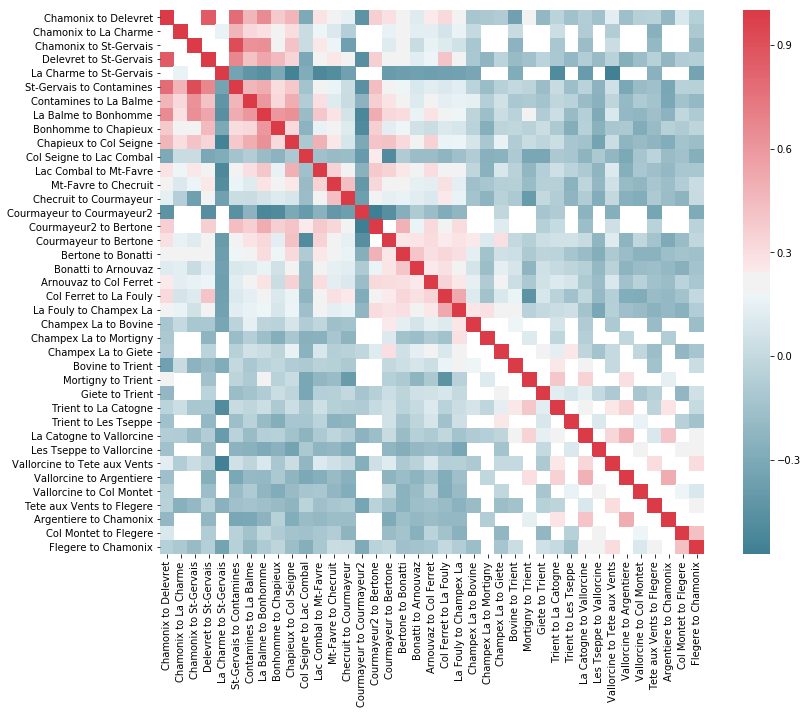

In [126]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [127]:
corr['max'] = corr[corr < 1].idxmax()

In [128]:
corr['max_val'] = corr[corr < 1].max()

In [129]:
max1 = corr['max']
max_val = corr['max_val']
frames = [max1, max_val]
maxy = pd.concat(frames, axis=1)

In [130]:
maxy

,max,max_val
Chamonix to Delevret,Delevret to St-Gervais,0.8574
Chamonix to La Charme,St-Gervais to Contamines,0.472776
Chamonix to St-Gervais,St-Gervais to Contamines,0.913978
Delevret to St-Gervais,Chamonix to Delevret,0.8574
La Charme to St-Gervais,Chamonix to La Charme,0.159056
St-Gervais to Contamines,Chamonix to St-Gervais,0.913978
Contamines to La Balme,Chamonix to St-Gervais,0.61905
La Balme to Bonhomme,Chamonix to Delevret,0.649833
Bonhomme to Chapieux,La Balme to Bonhomme,0.604764
Chapieux to Col Seigne,La Balme to Bonhomme,0.63082


In [131]:
maxy.sort_values(by = 'max_val').head(10)

,max,max_val
Courmayeur to Courmayeur2,Champex La to Giete,-0.0108933
La Charme to St-Gervais,Chamonix to La Charme,0.159056
Vallorcine to Col Montet,Les Tseppe to Vallorcine,0.192604
Les Tseppe to Vallorcine,Flegere to Chamonix,0.225358
Giete to Trient,Champex La to Giete,0.234044
Col Seigne to Lac Combal,Courmayeur2 to Bertone,0.244937
Bovine to Trient,Trient to La Catogne,0.258037
Trient to Les Tseppe,Champex La to Giete,0.258739
Champex La to Bovine,La Fouly to Champex La,0.264517
Champex La to Mortigny,La Fouly to Champex La,0.282925


In [132]:
maxy.sort_values(by = 'max_val', ascending=False).head(10)

,max,max_val
Chamonix to St-Gervais,St-Gervais to Contamines,0.913978
St-Gervais to Contamines,Chamonix to St-Gervais,0.913978
Chamonix to Delevret,Delevret to St-Gervais,0.8574
Delevret to St-Gervais,Chamonix to Delevret,0.8574
La Balme to Bonhomme,Chamonix to Delevret,0.649833
Chapieux to Col Seigne,La Balme to Bonhomme,0.63082
Contamines to La Balme,Chamonix to St-Gervais,0.61905
Bonhomme to Chapieux,La Balme to Bonhomme,0.604764
La Fouly to Champex La,Col Ferret to La Fouly,0.527266
Col Ferret to La Fouly,La Fouly to Champex La,0.527266


#  Correlation with finish time

In [133]:
df.head()

,Year,team,gender,category,nationality,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,AVG_Pace
0,2017,Salomon,Male,Senior Men (23-39),FR,1141.900000,4.022310,NaN,NaN,7.909121,NaN,4.586031,4.544534,5.117775,10.060820,5.096128,7.036173,4.797941,9.595926,11.377695,NaN,NaN,4.963401,6.456256,8.204950,5.493334,8.630844,5.997667,NaN,NaN,6.612290,NaN,NaN,10.976384,NaN,4.534051,NaN,13.508974,NaN,NaN,6.067253,NaN,NaN,6.668578,9.238605,7.145710
1,2017,Salomon,Male,Senior Men (23-39),ES,1156.983333,3.919652,NaN,NaN,8.170776,NaN,4.635109,4.563283,5.221164,10.041015,5.029801,7.042091,4.795822,9.629858,11.574286,NaN,NaN,5.201188,6.645315,8.614387,5.652586,8.717315,6.095252,NaN,NaN,7.230409,NaN,NaN,10.376782,NaN,4.599921,NaN,12.617061,NaN,NaN,6.130417,NaN,NaN,6.878126,8.948532,7.180423
2,2017,Hoka,Male,Senior Men (23-39),US,1193.000000,4.222026,NaN,NaN,7.905156,NaN,4.633745,4.893558,5.567362,11.493365,5.472986,7.746300,5.096753,10.315281,12.680109,NaN,NaN,5.318496,6.734412,8.245489,NaN,17.972368,6.169065,NaN,NaN,7.106542,NaN,NaN,9.575274,NaN,4.859741,NaN,13.073039,NaN,NaN,6.169017,NaN,NaN,7.251440,8.420044,7.866155
3,2017,Asics,Male,Senior Men (23-39),FR,1203.650000,4.023243,NaN,NaN,7.917050,NaN,4.584668,4.548860,6.048279,11.598990,5.654883,8.373579,5.198476,10.403504,13.130630,NaN,NaN,5.751268,6.988664,9.161654,6.128629,8.382241,6.136537,NaN,NaN,7.006963,NaN,NaN,11.006976,NaN,4.797531,NaN,12.852566,NaN,NaN,5.909343,NaN,NaN,6.832343,8.483622,7.538354
4,2017,Hoka,Male,Senior Men (23-39),US,1211.633333,3.918719,NaN,NaN,7.675217,NaN,4.703272,4.636838,5.111509,10.047617,5.123262,6.787629,4.255418,9.460199,12.139484,NaN,NaN,5.066442,6.814816,8.156304,5.500183,9.514465,7.895553,NaN,NaN,9.910542,NaN,NaN,8.987909,NaN,4.310825,NaN,11.199020,NaN,NaN,6.555019,NaN,NaN,7.438097,9.071714,7.261669


In [134]:
df1 = df.drop([ 'Year', 'team', 'gender', 'category', 'nationality'], axis=1)

In [135]:
corr = df1.corr()
corr

,time,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,AVG_Pace
time,1.000000,0.739020,0.530060,0.771241,0.652563,0.444756,0.596704,0.667004,0.755460,0.599176,0.775056,0.307732,0.687428,0.593602,0.600051,0.418480,0.680424,0.588203,0.764298,0.688924,0.689812,0.705014,0.842255,0.752498,0.578919,0.816062,0.810791,0.245378,0.674979,0.595554,0.642049,0.510306,0.645435,0.577864,0.471025,0.424530,0.235564,0.577952,0.549315,0.484815,0.921387
Chamonix to Delevret,0.739020,1.000000,NaN,NaN,0.887890,NaN,0.759183,0.558927,0.719470,0.601163,0.634209,0.219571,0.536782,0.494054,0.502239,0.180550,0.576078,0.410775,0.553974,0.450396,0.506760,0.547573,0.609494,0.553998,0.244395,0.526121,0.550928,0.058581,0.423767,0.330216,0.383327,0.311556,0.398213,0.362725,0.165014,0.245069,0.257755,0.267268,0.316142,0.303457,0.551713
Chamonix to La Charme,0.530060,NaN,1.000000,NaN,NaN,0.319231,0.446154,0.449466,0.409676,0.436613,0.451101,0.212464,0.355730,0.303347,0.167179,NaN,NaN,0.363810,0.448853,0.399357,0.315614,0.347573,0.427115,0.346686,NaN,NaN,0.367207,NaN,NaN,0.263010,NaN,0.185973,NaN,0.173949,NaN,NaN,0.022245,NaN,NaN,0.084243,0.421747
Chamonix to St-Gervais,0.771241,NaN,NaN,1.000000,NaN,NaN,0.853267,0.655345,0.711029,0.545055,0.542850,0.163936,0.498160,0.498682,0.208120,NaN,NaN,0.475070,0.573158,0.252427,0.487459,0.553787,0.637436,0.527881,NaN,NaN,0.501200,NaN,NaN,0.256901,NaN,0.203494,NaN,0.333982,NaN,NaN,0.219697,NaN,NaN,0.300835,0.386791
Delevret to St-Gervais,0.652563,0.887890,NaN,NaN,1.000000,NaN,0.663767,0.546397,0.659320,0.611698,0.559531,0.130760,0.474799,0.493243,0.513614,0.119727,0.595082,0.386674,0.502004,0.413234,0.431533,0.573811,0.554057,0.503654,0.201100,0.472529,0.550997,0.029140,0.425749,0.244990,0.350078,0.264613,0.404309,0.287727,0.172464,0.200164,0.271530,0.279594,0.304803,0.292638,0.501523
La Charme to St-Gervais,0.444756,NaN,0.319231,NaN,NaN,1.000000,0.516367,0.392932,0.368793,0.377505,0.386094,0.195590,0.338016,0.289869,0.127236,NaN,NaN,0.295679,0.366799,0.324919,0.216608,0.308671,0.345803,0.285134,NaN,NaN,0.292949,NaN,NaN,0.166412,NaN,0.118603,NaN,0.129831,NaN,NaN,-0.017344,NaN,NaN,0.124192,0.648553
St-Gervais to Contamines,0.596704,0.759183,0.446154,0.853267,0.663767,0.516367,1.000000,0.538161,0.596153,0.473739,0.547357,0.182740,0.452528,0.395707,0.289122,0.168951,0.642714,0.353190,0.473115,0.339448,0.349093,0.357739,0.477028,0.307269,0.266975,0.553318,0.337252,0.041442,0.448969,0.281586,0.425390,0.249441,0.439488,0.259710,0.174926,0.229340,0.066914,0.284475,0.340421,0.225428,0.401619
Contamines to La Balme,0.667004,0.558927,0.449466,0.655345,0.546397,0.392932,0.538161,1.000000,0.682914,0.508763,0.653857,0.264677,0.516195,0.393694,0.324373,0.236003,0.595810,0.426583,0.528880,0.421757,0.417054,0.411953,0.534443,0.570642,0.293522,0.492178,0.453857,0.041890,0.343979,0.293825,0.408657,0.186425,0.332761,0.250717,0.213917,0.228636,0.114582,0.234806,0.235924,0.161814,0.533437
La Balme to Bonhomme,0.755460,0.719470,0.409676,0.711029,0.659320,0.368793,0.596153,0.682914,1.000000,0.739561,0.727668,0.215558,0.583355,0.503547,0.376897,0.137121,0.686102,0.465064,0.604252,0.479972,0.475073,0.464482,0.593294,0.449982,0.310699,0.585

In [136]:
corr['time'].sort_values(ascending = False).head(10)

time                      1.000000
AVG_Pace                  0.921387
La Fouly to Champex La    0.842255
Champex La to Giete       0.816062
Bovine to Trient          0.810791
Chapieux to Col Seigne    0.775056
Chamonix to St-Gervais    0.771241
Bertone to Bonatti        0.764298
La Balme to Bonhomme      0.755460
Champex La to Bovine      0.752498
Name: time, dtype: float64

In [137]:
corr['time'].sort_values().head(10)

Tete aux Vents to Flegere    0.235564
Mortigny to Trient           0.245378
Col Seigne to Lac Combal     0.307732
Courmayeur to Courmayeur2    0.418480
Vallorcine to Col Montet     0.424530
La Charme to St-Gervais      0.444756
Vallorcine to Argentiere     0.471025
Flegere to Chamonix          0.484815
La Catogne to Vallorcine     0.510306
Chamonix to La Charme        0.530060
Name: time, dtype: float64

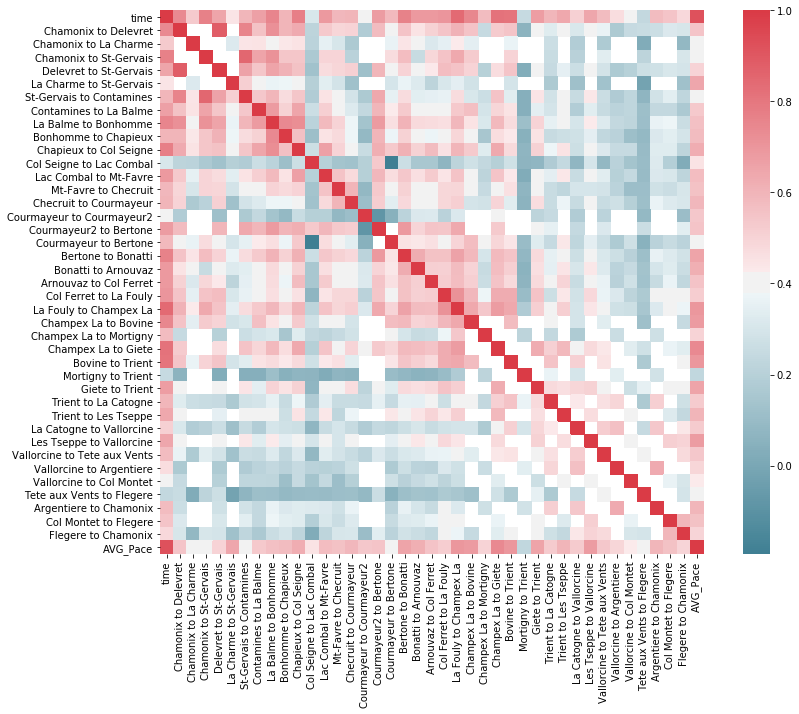

In [138]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Uphill vs Downhill races

In [139]:
stages = pd.read_csv('../../data/race_in_mins.csv', encoding = "ISO-8859-1")

In [140]:
stages

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff
0,0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,71.833333,NaN,NaN,33.250000,NaN,56.066667,52.516667,54.450000,25.400000,84.516667,19.816667,37.733333,23.566667,23.150000,NaN,NaN,52.183333,49.516667,33.733333,53.466667,53.233333,79.900000,NaN,NaN,90.750000,NaN,NaN,29.900000,NaN,41.300000,NaN,44.933333,NaN,NaN,28.816667,NaN,NaN,63.116667,38.750000,1141.900000,0.000000
1,1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,70.000000,NaN,NaN,34.350000,NaN,56.666667,52.733333,55.550000,25.350000,83.416667,19.833333,37.716667,23.650000,23.550000,NaN,NaN,54.683333,50.966667,35.416667,55.016667,53.766667,81.200000,NaN,NaN,99.233333,NaN,NaN,28.266667,NaN,41.900000,NaN,41.966667,NaN,NaN,29.116667,NaN,NaN,65.100000,37.533333,1156.983333,15.083333
2,2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,75.400000,NaN,NaN,33.233333,NaN,56.650000,56.550000,59.233333,29.016667,90.766667,21.816667,40.083333,25.333333,25.800000,NaN,NaN,55.916667,51.650000,33.900000,NaN,110.850000,82.183333,NaN,NaN,97.533333,NaN,NaN,26.083333,NaN,44.266667,NaN,43.483333,NaN,NaN,29.300000,NaN,NaN,68.633333,35.316667,1193.000000,51.100000
3,3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,71.850000,NaN,NaN,33.283333,NaN,56.050000,52.566667,64.350000,29.283333,93.783333,23.583333,40.883333,25.550000,26.716667,NaN,NaN,60.466667,53.600000,37.666667,59.650000,51.700000,81.750000,NaN,NaN,96.166667,NaN,NaN,29.983333,NaN,43.700000,NaN,42.750000,NaN,NaN,28.066667,NaN,NaN,64.666667,35.583333,1203.650000,61.750000
4,4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,69.983333,NaN,NaN,32.266667,NaN,57.500000,53.583333,54.383333,25.366667,84.966667,19.116667,33.466667,23.233333,24.700000,NaN,NaN,53.266667,52.266667,33.533333,53.533333,58.683333,105.183333,NaN,NaN,136.016667,NaN,NaN,24.483333,NaN,39.266667,NaN,37.250000,NaN,NaN,31.133333,NaN,NaN,70.400000,38.050000,1211.633333,69.733333
5,5,5,2017,17,f94453abd655927dc15006974bce67ad,The North Face / Buff,Male,Senior Men (23-39),6,ES,73.266667,NaN,NaN,33.500000,NaN,57.183333,53.266667,58.700000,28.966667,89.750000,21.316667,41.533333,23.500000,24.150000,NaN,NaN,59.050000,55.383333,38.283333,64.050000,58.000000,82.850000,NaN,NaN,96.033333,NaN,NaN,29.733333,NaN,44.116667,NaN,44.750000,NaN,NaN,30.666667,NaN,NaN,70.950000,33.716667,1212.716667,70.816667
6,6,6,2017,9,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,Male,Senior Men (23-39),7,US,74.300000,NaN,NaN,34.700000,NaN,57.366667,55.466667,59.200000,29.383333,90.066667,22.200000,40.000000,25.366667,25.816667,NaN,NaN,54.850000,51.016667,34.966667,NaN,117.400000,86.050000,NaN,NaN,96.850000,NaN,NaN,29.116667,NaN,47.400000,NaN,44.183333,NaN,NaN,31.866667,NaN,NaN,73.783333,38.450000,1219.800000,77.900000
7,7,7,2017,13,f9afc937b3b009afc6def5029e0cf169,VIBRAM,Male,Senior Men (23-39),8,LT,74.233333,NaN,NaN,34.116667,NaN,56.466667,51.383333,61.650000,29.833333,90.450000,22.933333,42.883333,26.

In [141]:
df_non_stage = stages[[  'Year', 
'team'           ,
'gender',
'category'        , 
'nationality'    ,
'time'
 ]]

In [142]:
stages = stages.filter(like = 'to')
times = stages.filter(like = 'time')

In [143]:
stages = stages.head(10)

In [144]:
stages

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,71.833333,NaN,NaN,33.250000,NaN,56.066667,52.516667,54.450000,25.400000,84.516667,19.816667,37.733333,23.566667,23.150000,NaN,NaN,52.183333,49.516667,33.733333,53.466667,53.233333,79.900000,NaN,NaN,90.750000,NaN,NaN,29.900000,NaN,41.300000,NaN,44.933333,NaN,NaN,28.816667,NaN,NaN,63.116667,38.750000
1,70.000000,NaN,NaN,34.350000,NaN,56.666667,52.733333,55.550000,25.350000,83.416667,19.833333,37.716667,23.650000,23.550000,NaN,NaN,54.683333,50.966667,35.416667,55.016667,53.766667,81.200000,NaN,NaN,99.233333,NaN,NaN,28.266667,NaN,41.900000,NaN,41.966667,NaN,NaN,29.116667,NaN,NaN,65.100000,37.533333
2,75.400000,NaN,NaN,33.233333,NaN,56.650000,56.550000,59.233333,29.016667,90.766667,21.816667,40.083333,25.333333,25.800000,NaN,NaN,55.916667,51.650000,33.900000,NaN,110.850000,82.183333,NaN,NaN,97.533333,NaN,NaN,26.083333,NaN,44.266667,NaN,43.483333,NaN,NaN,29.300000,NaN,NaN,68.633333,35.316667
3,71.850000,NaN,NaN,33.283333,NaN,56.050000,52.566667,64.350000,29.283333,93.783333,23.583333,40.883333,25.550000,26.716667,NaN,NaN,60.466667,53.600000,37.666667,59.650000,51.700000,81.750000,NaN,NaN,96.166667,NaN,NaN,29.983333,NaN,43.700000,NaN,42.750000,NaN,NaN,28.066667,NaN,NaN,64.666667,35.583333
4,69.983333,NaN,NaN,32.266667,NaN,57.500000,53.583333,54.383333,25.366667,84.966667,19.116667,33.466667,23.233333,24.700000,NaN,NaN,53.266667,52.266667,33.533333,53.533333,58.683333,105.183333,NaN,NaN,136.016667,NaN,NaN,24.483333,NaN,39.266667,NaN,37.250000,NaN,NaN,31.133333,NaN,NaN,70.400000,38.050000
5,73.266667,NaN,NaN,33.500000,NaN,57.183333,53.266667,58.700000,28.966667,89.750000,21.316667,41.533333,23.500000,24.150000,NaN,NaN,59.050000,55.383333,38.283333,64.050000,58.000000,82.850000,NaN,NaN,96.033333,NaN,NaN,29.733333,NaN,44.116667,NaN,44.750000,NaN,NaN,30.666667,NaN,NaN,70.950000,33.716667
6,74.300000,NaN,NaN,34.700000,NaN,57.366667,55.466667,59.200000,29.383333,90.066667,22.200000,40.000000,25.366667,25.816667,NaN,NaN,54.850000,51.016667,34.966667,NaN,117.400000,86.050000,NaN,NaN,96.850000,NaN,NaN,29.116667,NaN,47.400000,NaN,44.183333,NaN,NaN,31.866667,NaN,NaN,73.783333,38.450000
7,74.233333,NaN,NaN,34.116667,NaN,56.466667,51.383333,61.650000,29.833333,90.450000,22.933333,42.883333,26.783333,28.350000,NaN,NaN,NaN,122.433333,38.733333,64.633333,59.866667,90.700000,NaN,NaN,105.366667,NaN,NaN,32.633333,NaN,51.433333,NaN,50.516667,NaN,NaN,32.750000,NaN,NaN,76.533333,39.633333
8,69.950000,NaN,NaN,37.850000,NaN,55.783333,52.950000,56.666667,31.250000,86.783333,23.050000,40.850000,25.666667,26.816667,NaN,NaN,60.766667,56.333333,41.983333,62.533333,59.783333,87.600000,NaN,NaN,99.700000,NaN,NaN,35.533333,NaN,53.416667,NaN,55.366667,NaN,NaN,45.783333,NaN,NaN,79.666667,42.450000
9,75.466667,NaN,NaN,32.933333,NaN,56.766667,55.566667,60.166667,28.800000,96.750000,23.133333,44.600000,25.933333,25.616667,NaN,NaN,65.450000,60.066667,39.683333,64.066667,54.800000,97.700000,NaN,NaN,109.200000,NaN,NaN,28.766667,NaN,49.833333,NaN,49.250000,NaN,NaN,33.933333,NaN,NaN,79.983333,46.050000


In [145]:
grades

Chamonix to Delevret               0.761532
Chamonix to Col de Voza                 NaN
Chamonix to La Charme              0.838133
Chamonix to St-Gervais             1.053950
Delevret to St-Gervais             1.807799
Col de Voza to Contamines               NaN
La Charme to St-Gervais            1.997080
St-Gervais to Contamines           0.842499
Contamines to La Balme             0.700934
Contamines to Bonhomme                  NaN
La Balme to Bonhomme               0.516947
La Balme to Chapieux                    NaN
Bonhomme to Chapieux               2.020086
Chapieux to Col Seigne             0.621062
Col Seigne to Refuge Elisabeth          NaN
Col Seigne to Lac Combal           1.739811
Col Seigne to Mt-Favre                  NaN
Refuge Elisabeth to Mt-Favre            NaN
Refuge Elisabeth to Checruit            NaN
Lac Combal to Mt-Favre             0.508616
Mt-Favre to Checruit               1.832320
Mt-Favre to Courmayeur                  NaN
Checruit to Courmayeur          

In [146]:
uphill = grades[grades > 1]

In [147]:
uphill

Chamonix to St-Gervais       1.053950
Delevret to St-Gervais       1.807799
La Charme to St-Gervais      1.997080
Bonhomme to Chapieux         2.020086
Col Seigne to Lac Combal     1.739811
Mt-Favre to Checruit         1.832320
Checruit to Courmayeur       2.015056
Bonatti to Arnouvaz          1.264795
Col Ferret to La Peulaz      1.842283
Col Ferret to La Fouly       1.621323
La Peulaz to La Fouly        1.516311
La Fouly to Champex La       1.050905
Champex La to Mortigny       1.302929
Bovine to Trient             1.630943
Giete to Trient              1.798805
Trient to Vallorcine         1.035690
La Catogne to Vallorcine     1.834317
Les Tseppe to Vallorcine     1.743740
Tete aux Vents to Flegere    1.487422
Argentiere to Chamonix       1.168522
Flegere to Chamonix          1.764275
Name: grade, dtype: float64

In [148]:
upelev = uphill * stages

In [149]:
upelev = upelev.dropna(axis='columns', how='all')

In [150]:
upelev['Uphill_time'] = upelev.sum(axis=1)

In [151]:
upelev

,Bonatti to Arnouvaz,Bonhomme to Chapieux,Checruit to Courmayeur,Col Ferret to La Fouly,Col Seigne to Lac Combal,Delevret to St-Gervais,Flegere to Chamonix,Giete to Trient,La Fouly to Champex La,Les Tseppe to Vallorcine,Mt-Favre to Checruit,Uphill_time
0,42.665742,51.310183,46.648549,86.308442,34.477248,60.109317,68.365675,53.784281,83.967344,78.352050,43.181667,649.170498
1,44.794813,51.209179,47.454571,87.173147,34.506245,62.097896,66.219140,50.846232,85.333521,73.178954,43.334360,646.148060
2,42.876541,58.616160,51.988447,179.723684,37.956869,60.079187,62.308329,46.918841,86.366912,75.823627,46.418765,749.077362
3,47.640601,59.154850,53.835582,83.822413,41.030535,60.169577,62.778802,53.934182,85.911519,74.544884,46.815768,669.638714
4,42.412783,51.242847,49.771886,95.144653,33.259381,58.331648,67.130682,44.040752,110.537737,64.954314,42.570894,659.397576
5,48.420558,58.515156,48.663605,94.036749,37.086964,60.561267,59.485488,53.484480,87.067515,78.032364,43.059512,668.413660
6,44.225656,59.356858,52.022032,190.343351,38.623797,62.730626,67.836392,52.375217,90.430413,77.044245,46.479843,781.468429
7,48.989716,60.265897,57.126840,97.063219,39.899658,61.676077,69.924118,58.701016,95.317123,88.087931,49.075629,726.127224
8,53.100299,63.127686,54.037088,96.928109,40.102636,68.425193,74.893494,63.917552,92.059316,96.545070,47.029538,750.165980
9,50.191271,58.178475,51.619020,88.848515,40.247620,59.536848,81.244886,51.745635,102.673461,85.879194,47.518157,717.683081


In [152]:
upelev = upelev.sort_values(by = ['Uphill_time'], ascending = True)

In [153]:
upelev

,Bonatti to Arnouvaz,Bonhomme to Chapieux,Checruit to Courmayeur,Col Ferret to La Fouly,Col Seigne to Lac Combal,Delevret to St-Gervais,Flegere to Chamonix,Giete to Trient,La Fouly to Champex La,Les Tseppe to Vallorcine,Mt-Favre to Checruit,Uphill_time
1,44.794813,51.209179,47.454571,87.173147,34.506245,62.097896,66.219140,50.846232,85.333521,73.178954,43.334360,646.148060
0,42.665742,51.310183,46.648549,86.308442,34.477248,60.109317,68.365675,53.784281,83.967344,78.352050,43.181667,649.170498
4,42.412783,51.242847,49.771886,95.144653,33.259381,58.331648,67.130682,44.040752,110.537737,64.954314,42.570894,659.397576
5,48.420558,58.515156,48.663605,94.036749,37.086964,60.561267,59.485488,53.484480,87.067515,78.032364,43.059512,668.413660
3,47.640601,59.154850,53.835582,83.822413,41.030535,60.169577,62.778802,53.934182,85.911519,74.544884,46.815768,669.638714
9,50.191271,58.178475,51.619020,88.848515,40.247620,59.536848,81.244886,51.745635,102.673461,85.879194,47.518157,717.683081
7,48.989716,60.265897,57.126840,97.063219,39.899658,61.676077,69.924118,58.701016,95.317123,88.087931,49.075629,726.127224
2,42.876541,58.616160,51.988447,179.723684,37.956869,60.079187,62.308329,46.918841,86.366912,75.823627,46.418765,749.077362
8,53.100299,63.127686,54.037088,96.928109,40.102636,68.425193,74.893494,63.917552,92.059316,96.545070,47.029538,750.165980
6,44.225656,59.356858,52.022032,190.343351,38.623797,62.730626,67.836392,52.375217,90.430413,77.044245,46.479843,781.468429


In [154]:
upelev.insert(0, 'Position', pd.factorize(upelev['Uphill_time'])[0] + 1)

In [155]:
upelev

,Position,Bonatti to Arnouvaz,Bonhomme to Chapieux,Checruit to Courmayeur,Col Ferret to La Fouly,Col Seigne to Lac Combal,Delevret to St-Gervais,Flegere to Chamonix,Giete to Trient,La Fouly to Champex La,Les Tseppe to Vallorcine,Mt-Favre to Checruit,Uphill_time
1,1,44.794813,51.209179,47.454571,87.173147,34.506245,62.097896,66.219140,50.846232,85.333521,73.178954,43.334360,646.148060
0,2,42.665742,51.310183,46.648549,86.308442,34.477248,60.109317,68.365675,53.784281,83.967344,78.352050,43.181667,649.170498
4,3,42.412783,51.242847,49.771886,95.144653,33.259381,58.331648,67.130682,44.040752,110.537737,64.954314,42.570894,659.397576
5,4,48.420558,58.515156,48.663605,94.036749,37.086964,60.561267,59.485488,53.484480,87.067515,78.032364,43.059512,668.413660
3,5,47.640601,59.154850,53.835582,83.822413,41.030535,60.169577,62.778802,53.934182,85.911519,74.544884,46.815768,669.638714
9,6,50.191271,58.178475,51.619020,88.848515,40.247620,59.536848,81.244886,51.745635,102.673461,85.879194,47.518157,717.683081
7,7,48.989716,60.265897,57.126840,97.063219,39.899658,61.676077,69.924118,58.701016,95.317123,88.087931,49.075629,726.127224
2,8,42.876541,58.616160,51.988447,179.723684,37.956869,60.079187,62.308329,46.918841,86.366912,75.823627,46.418765,749.077362
8,9,53.100299,63.127686,54.037088,96.928109,40.102636,68.425193,74.893494,63.917552,92.059316,96.545070,47.029538,750.165980
6,10,44.225656,59.356858,52.022032,190.343351,38.623797,62.730626,67.836392,52.375217,90.430413,77.044245,46.479843,781.468429


In [156]:
downhill = grades[grades < 1]

In [157]:
downhill

Chamonix to Delevret            0.761532
Chamonix to La Charme           0.838133
St-Gervais to Contamines        0.842499
Contamines to La Balme          0.700934
La Balme to Bonhomme            0.516947
Chapieux to Col Seigne          0.621062
Lac Combal to Mt-Favre          0.508616
Courmayeur to Courmayeur2       0.676900
Courmayeur2 to Bertone          0.432536
Courmayeur to Bertone           0.466062
Bertone to Bonatti              0.964853
Arnouvaz to Col Ferret          0.462344
Champex La to Bovine            0.796647
Champex La to Giete             0.823349
Mortigny to Trient              0.715465
Trient to La Catogne            0.521544
Trient to Les Tseppe            0.526960
Vallorcine to Tete aux Vents    0.584216
Vallorcine to Argentiere        0.990593
Vallorcine to Col Montet        0.779023
Col Montet to Flegere           0.739583
Name: grade, dtype: float64

In [158]:
downhill.count()

21

In [159]:
uphill.count()

21

In [160]:
downelev = downhill * stages

In [161]:
downelev = downelev.dropna(axis='columns', how='all')

In [162]:
downelev['Downhill_time'] = downelev.sum(axis=1)

In [163]:
downelev

,Arnouvaz to Col Ferret,Bertone to Bonatti,Chamonix to Delevret,Champex La to Giete,Chapieux to Col Seigne,Col Montet to Flegere,Contamines to La Balme,Courmayeur to Bertone,La Balme to Bonhomme,Lac Combal to Mt-Favre,St-Gervais to Contamines,Trient to Les Tseppe,Vallorcine to Col Montet,Downhill_time
0,24.720002,47.776295,54.703415,74.718881,52.490120,46.680044,36.810722,24.320666,28.147761,19.191765,47.236121,21.763443,22.448835,501.008071
1,25.436635,49.175331,53.307272,81.703621,51.806952,48.146885,36.962591,25.485821,28.716403,19.183288,47.741620,22.079619,22.682542,512.428581
2,NaN,49.834648,57.419548,80.303929,56.371760,50.760080,39.637823,26.060630,30.620491,20.387012,47.727578,23.326757,22.825362,505.275619
3,27.578830,51.716111,54.716107,79.178686,58.245298,47.826398,36.845769,28.181212,33.265536,20.793905,47.222079,23.028147,21.864568,530.462646
4,24.750825,50.429640,53.294580,111.989126,52.769598,52.066677,37.558385,24.825566,28.113298,17.021672,48.443703,20.691958,24.253571,546.208599
5,29.613144,53.436765,55.794945,79.068906,55.740347,52.473448,37.336423,27.520958,30.344786,21.124505,48.176911,23.247713,23.890027,537.768878
6,NaN,49.223574,56.581862,79.741307,55.937016,54.568935,38.878478,25.563498,30.603259,20.344628,48.331370,24.977898,24.824854,509.576679
7,29.882845,118.130146,56.531093,86.753493,56.175090,56.602789,36.016330,NaN,31.869780,21.811136,47.573120,27.103303,25.512990,593.962116
8,28.911922,54.353375,53.269196,82.087851,53.897862,58.920151,37.114461,28.321031,29.293661,20.776951,46.997413,28.148440,35.666252,557.758563
9,29.620850,57.955492,57.470316,89.909662,60.087783,59.154352,38.948571,30.503754,31.102975,22.684260,47.825870,26.260167,26.434834,577.958887


In [164]:
downelev = downelev.sort_values(by = ['Downhill_time'], ascending = True)

In [165]:
downelev

,Arnouvaz to Col Ferret,Bertone to Bonatti,Chamonix to Delevret,Champex La to Giete,Chapieux to Col Seigne,Col Montet to Flegere,Contamines to La Balme,Courmayeur to Bertone,La Balme to Bonhomme,Lac Combal to Mt-Favre,St-Gervais to Contamines,Trient to Les Tseppe,Vallorcine to Col Montet,Downhill_time
0,24.720002,47.776295,54.703415,74.718881,52.490120,46.680044,36.810722,24.320666,28.147761,19.191765,47.236121,21.763443,22.448835,501.008071
2,NaN,49.834648,57.419548,80.303929,56.371760,50.760080,39.637823,26.060630,30.620491,20.387012,47.727578,23.326757,22.825362,505.275619
6,NaN,49.223574,56.581862,79.741307,55.937016,54.568935,38.878478,25.563498,30.603259,20.344628,48.331370,24.977898,24.824854,509.576679
1,25.436635,49.175331,53.307272,81.703621,51.806952,48.146885,36.962591,25.485821,28.716403,19.183288,47.741620,22.079619,22.682542,512.428581
3,27.578830,51.716111,54.716107,79.178686,58.245298,47.826398,36.845769,28.181212,33.265536,20.793905,47.222079,23.028147,21.864568,530.462646
5,29.613144,53.436765,55.794945,79.068906,55.740347,52.473448,37.336423,27.520958,30.344786,21.124505,48.176911,23.247713,23.890027,537.768878
4,24.750825,50.429640,53.294580,111.989126,52.769598,52.066677,37.558385,24.825566,28.113298,17.021672,48.443703,20.691958,24.253571,546.208599
8,28.911922,54.353375,53.269196,82.087851,53.897862,58.920151,37.114461,28.321031,29.293661,20.776951,46.997413,28.148440,35.666252,557.758563
9,29.620850,57.955492,57.470316,89.909662,60.087783,59.154352,38.948571,30.503754,31.102975,22.684260,47.825870,26.260167,26.434834,577.958887
7,29.882845,118.130146,56.531093,86.753493,56.175090,56.602789,36.016330,NaN,31.869780,21.811136,47.573120,27.103303,25.512990,593.962116


In [166]:
downelev.insert(0, 'Position', pd.factorize(downelev['Downhill_time'])[0] + 1)

In [167]:
downelev

,Position,Arnouvaz to Col Ferret,Bertone to Bonatti,Chamonix to Delevret,Champex La to Giete,Chapieux to Col Seigne,Col Montet to Flegere,Contamines to La Balme,Courmayeur to Bertone,La Balme to Bonhomme,Lac Combal to Mt-Favre,St-Gervais to Contamines,Trient to Les Tseppe,Vallorcine to Col Montet,Downhill_time
0,1,24.720002,47.776295,54.703415,74.718881,52.490120,46.680044,36.810722,24.320666,28.147761,19.191765,47.236121,21.763443,22.448835,501.008071
2,2,NaN,49.834648,57.419548,80.303929,56.371760,50.760080,39.637823,26.060630,30.620491,20.387012,47.727578,23.326757,22.825362,505.275619
6,3,NaN,49.223574,56.581862,79.741307,55.937016,54.568935,38.878478,25.563498,30.603259,20.344628,48.331370,24.977898,24.824854,509.576679
1,4,25.436635,49.175331,53.307272,81.703621,51.806952,48.146885,36.962591,25.485821,28.716403,19.183288,47.741620,22.079619,22.682542,512.428581
3,5,27.578830,51.716111,54.716107,79.178686,58.245298,47.826398,36.845769,28.181212,33.265536,20.793905,47.222079,23.028147,21.864568,530.462646
5,6,29.613144,53.436765,55.794945,79.068906,55.740347,52.473448,37.336423,27.520958,30.344786,21.124505,48.176911,23.247713,23.890027,537.768878
4,7,24.750825,50.429640,53.294580,111.989126,52.769598,52.066677,37.558385,24.825566,28.113298,17.021672,48.443703,20.691958,24.253571,546.208599
8,8,28.911922,54.353375,53.269196,82.087851,53.897862,58.920151,37.114461,28.321031,29.293661,20.776951,46.997413,28.148440,35.666252,557.758563
9,9,29.620850,57.955492,57.470316,89.909662,60.087783,59.154352,38.948571,30.503754,31.102975,22.684260,47.825870,26.260167,26.434834,577.958887
7,10,29.882845,118.130146,56.531093,86.753493,56.175090,56.602789,36.016330,NaN,31.869780,21.811136,47.573120,27.103303,25.512990,593.962116


In [168]:
upelev

,Position,Bonatti to Arnouvaz,Bonhomme to Chapieux,Checruit to Courmayeur,Col Ferret to La Fouly,Col Seigne to Lac Combal,Delevret to St-Gervais,Flegere to Chamonix,Giete to Trient,La Fouly to Champex La,Les Tseppe to Vallorcine,Mt-Favre to Checruit,Uphill_time
1,1,44.794813,51.209179,47.454571,87.173147,34.506245,62.097896,66.219140,50.846232,85.333521,73.178954,43.334360,646.148060
0,2,42.665742,51.310183,46.648549,86.308442,34.477248,60.109317,68.365675,53.784281,83.967344,78.352050,43.181667,649.170498
4,3,42.412783,51.242847,49.771886,95.144653,33.259381,58.331648,67.130682,44.040752,110.537737,64.954314,42.570894,659.397576
5,4,48.420558,58.515156,48.663605,94.036749,37.086964,60.561267,59.485488,53.484480,87.067515,78.032364,43.059512,668.413660
3,5,47.640601,59.154850,53.835582,83.822413,41.030535,60.169577,62.778802,53.934182,85.911519,74.544884,46.815768,669.638714
9,6,50.191271,58.178475,51.619020,88.848515,40.247620,59.536848,81.244886,51.745635,102.673461,85.879194,47.518157,717.683081
7,7,48.989716,60.265897,57.126840,97.063219,39.899658,61.676077,69.924118,58.701016,95.317123,88.087931,49.075629,726.127224
2,8,42.876541,58.616160,51.988447,179.723684,37.956869,60.079187,62.308329,46.918841,86.366912,75.823627,46.418765,749.077362
8,9,53.100299,63.127686,54.037088,96.928109,40.102636,68.425193,74.893494,63.917552,92.059316,96.545070,47.029538,750.165980
6,10,44.225656,59.356858,52.022032,190.343351,38.623797,62.730626,67.836392,52.375217,90.430413,77.044245,46.479843,781.468429
